In [163]:
import keras
from keras.layers import concatenate
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Clf type
Logistic Regression/ ANN/ Random Forest/ SVM/ Boosting/ Knn
### Dataset


In [164]:
occupance = pd.read_table('occupancy_data/datatraining.txt',delimiter=',')
Stu_Eva = pd.read_csv('turkiye-student-evaluation_generic.csv',delimiter=',',header=0)
Activity = pd.read_csv('Activity_Recognition/1.csv',delimiter=',',header=None)
Parking = pd.read_csv('Parking_Birminghan_Data.csv',delimiter=',',header=0)
Whole = pd.read_csv('Wholesale_customers.csv',delimiter=',',header=0)


In [165]:
Whole.drop(columns=['Region'], inplace=True)
Whole_x = Whole.iloc[:,1:]
Whole_y = Whole.iloc[:,0]
#Whole_y = np.reshape(Whole_y, (Whole_y.shape[0], 1))

In [166]:
# test on activity dataset
# drop the time series column
Activity.columns=['sequential','x','y','z','activity_type']
Activity.drop(columns=['sequential'],inplace=True)

In [167]:
# manually divide 7 kinds of activity into 2 categories
# first one is going up
# second one is the remaining
Activity['activity_type'].replace([0,1,2,3,4,5,6,7],[0,0,1,0,0,1,0,0],inplace=True)

Act_x = Activity.iloc[:,:3]
Act_y = Activity.iloc[:,3:]

In [168]:
# test on occupance dataset
occupance.drop(columns=['date'],inplace=True)
occ_x = occupance.iloc[:,:-1]
occ_y = occupance.iloc[:,-1]

In [169]:
# test on student evaluation dataset
Stu_Eva = pd.concat([Stu_Eva,pd.get_dummies(Stu_Eva['instr'])],axis=1)
Instr = Stu_Eva.iloc[:,0]
Stu_Eva.drop(columns=['instr'],inplace=True)
eva_x = Stu_Eva.iloc[:,0:-3]
eva_y = Stu_Eva.iloc[:,-3:]

In [170]:
# process parking dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Parking.drop(columns=['LastUpdated'],inplace=True)
Parking['parking_label'] = le.fit_transform(Parking['SystemCodeNumber'])
parking_label = Parking['parking_label']
Parking.drop(columns=['parking_label'],inplace=True)

In [171]:
Parking = pd.concat([Parking,pd.get_dummies(Parking['SystemCodeNumber'])],axis=1)
Parking.drop(columns=['SystemCodeNumber'],inplace=True)
parking_x = Parking.iloc[:,:2]
parking_y = Parking.iloc[:,2:]

### Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
sc = StandardScaler()
# different test size
test_size=[0.2,0.5,0.8]

In [240]:
ave_acc_whole_log = []
ave_acc_whole_log_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_whole_log.append(score2/3.0)
    ave_acc_whole_log_train.append(score1/3.0)
print ave_acc_whole_log
print ave_acc_whole_log_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


[0.9053030303030303, 0.9015151515151515, 0.8778409090909092]
[0.9043560606060606, 0.9212121212121213, 0.9280303030303031]


In [174]:
ave_acc_activity_log = []
ave_acc_activity_log_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_activity_log.append(score2/3.0)
    ave_acc_activity_log_train.append(score1/3.0)
print ave_acc_activity_log 
print ave_acc_activity_log_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


[0.97463667784581, 0.9743223673144535, 0.9742130188742139]
[0.974197435897436, 0.9742605128205128, 0.9746564102564103]


In [176]:
ave_acc_occ_log = []
ave_acc_occ_log_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial').fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_occ_log.append(score2/3.0)
    ave_acc_occ_log_train.append(score1/3.0)
print ave_acc_occ_log
print ave_acc_occ_log_train

[0.9873132801309596, 0.9871480026195153, 0.9859810693271936]
[0.9856718861938388, 0.9850978465569474, 0.9864864864864865]


In [178]:
ave_acc_eva_log=[]
ave_acc_eva_log_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, Instr, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial').fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_eva_log.append(score2/3.0)
    ave_acc_eva_log_train.append(score1/3.0)
print ave_acc_eva_log
print ave_acc_eva_log_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


[0.6056701030927836, 0.618327605956472, 0.6106099656357389]
[0.6241408934707904, 0.6217640320733104, 0.6222794959908362]


In [179]:
ave_acc_parking_log=[]
ave_acc_parking_log_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_label, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial').fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_parking_log.append(score2/3.0)
    ave_acc_parking_log_train.append(score1/3.0)
print ave_acc_parking_log
print ave_acc_parking_log_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


[0.6312523329600597, 0.5826007428560763, 0.5377149389888243]
[0.6289854058026808, 0.585750550640236, 0.5486023612861076]


### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
# Use Grid Search
clf = RandomForestClassifier()
parameter = [{'n_estimators':[20,50,100],'max_depth':[5,10,50]}]
search = GridSearchCV(clf,parameter,cv=3)
search.fit(Act_x,Act_y)
print search.best_params_

{'n_estimators': 50, 'max_depth': 5}


In [181]:
clf = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],max_depth=search.best_params_['max_depth'])



In [182]:
ave_acc_activity_rf = []
ave_acc_activity_rf_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1,y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_activity_rf.append(score2/3.0)
    ave_acc_activity_rf_train.append(score1/3.0)
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [183]:
print ave_acc_activity_rf
print ave_acc_activity_rf_train

[0.9757340799770263, 0.9760126029218101, 0.9757463404127661]
[0.976428205128205, 0.9766728205128206, 0.9768820512820513]


In [184]:
search.fit(Whole_x,Whole_y)
print search.best_params_
clf = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],max_depth=search.best_params_['max_depth'])
ave_acc_whole_rf = []
ave_acc_whole_rf_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_whole_rf.append(score2/3.0)
    ave_acc_whole_rf_train.append(score1/3.0)

{'n_estimators': 20, 'max_depth': 50}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [185]:
print ave_acc_whole_rf
print ave_acc_whole_rf_train

[0.9015151515151515, 0.8984848484848484, 0.9043560606060606]
[0.9981060606060606, 0.9984848484848485, 1.0]


In [186]:
search.fit(occ_x,occ_y)
print search.best_params_
clf = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],max_depth=search.best_params_['max_depth'])
ave_acc_occ_rf = []
ave_acc_occ_rf_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_occ_rf.append(score2/3.0)
    ave_acc_occ_rf_train.append(score1/3.0)
    

{'n_estimators': 100, 'max_depth': 5}


In [187]:
print ave_acc_occ_rf
print ave_acc_occ_rf_train

[0.9914057704112954, 0.989603798297315, 0.9884369403939627]
[0.9914031317163033, 0.9918938835666914, 0.9948812448812449]


In [188]:
search.fit(eva_x,eva_y)
print search.best_params_
clf = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],max_depth=search.best_params_['max_depth'])
ave_acc_eva_rf=[]
ave_acc_eva_rf_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, eva_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_eva_rf.append(score2/3.0)
    ave_acc_eva_rf_train.append(score1/3.0)

{'n_estimators': 50, 'max_depth': 50}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [189]:
print ave_acc_eva_rf
print ave_acc_eva_rf_train

[0.8473654066437573, 0.8355097365406644, 0.8011884306987399]
[0.9944873997709051, 0.9949599083619702, 0.9959908361970218]


In [190]:
search.fit(parking_x,parking_y)
print search.best_params_
clf = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],max_depth=search.best_params_['max_depth'])
ave_acc_parking_rf=[]
ave_acc_parking_rf_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_parking_rf.append(score2/3.0)
    ave_acc_parking_rf_train.append(score1/3.0)
    

{'n_estimators': 100, 'max_depth': 50}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [192]:
print ave_acc_parking_rf
print ave_acc_parking_rf_train

[0.9962206047032475, 0.9911342553707746, 0.9793751895662725]
[1.0, 1.0, 1.0]


### SVM

In [193]:
from sklearn.svm import SVC

clf = SVC(gamma='scale')
C_list = [{'kernel':['rbf'],'C':[0.001,0.1]}]
search = GridSearchCV(clf, C_list,cv=3)

In [194]:
from sklearn import preprocessing
search.fit(Act_x,Act_y)

clf=SVC(kernel=search.best_params_['kernel'],C=search.best_params_['C'])
print search.best_params_

ave_acc_activity_svm = []
ave_acc_activity_svm_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1,y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_activity_svm.append(score2/3.0)
    ave_acc_activity_svm_train.append(score1/3.0)
print ave_acc_activity_svm
print ave_acc_activity_svm_train

{'kernel': 'rbf', 'C': 0.001}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


[0.9751699947693918, 0.9747859513523935, 0.9745719904718682]
[0.9745230769230769, 0.9745189743589743, 0.974974358974359]


In [195]:
search.fit(Whole_x,Whole_y)

clf=SVC(kernel=search.best_params_['kernel'],C=search.best_params_['C'])
print search.best_params_
ave_acc_whole_svm = []
ave_acc_whole_svm_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1,y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_whole_svm.append(score2/3.0)
    ave_acc_whole_svm_train.append(score1/3.0)
print ave_acc_whole_svm
print ave_acc_whole_svm_train


{'kernel': 'rbf', 'C': 0.001}
[0.6969696969696969, 0.6696969696969696, 0.6761363636363636]
[0.6723484848484849, 0.6848484848484849, 0.6818181818181818]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [196]:
search.fit(occ_x,occ_y)
clf=SVC(kernel=search.best_params_['kernel'],C=search.best_params_['C'])
print search.best_params_
#clf=SVC(kernel='rbf',C=0.01)
ave_acc_occ_svm = []
ave_acc_occ_svm_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_occ_svm.append(score2/3.0)
    ave_acc_occ_svm_train.append(score1/3.0)

print ave_acc_occ_svm
print ave_acc_occ_svm_train

{'kernel': 'rbf', 'C': 0.1}
[0.9895641497851443, 0.988867059593975, 0.9884881043745204]
[0.9884863371200492, 0.9885368050438058, 0.9864864864864865]


In [197]:
search.fit(eva_x,Instr)
clf=SVC(kernel=search.best_params_['kernel'],C=search.best_params_['C'])
print search.best_params_
#clf=SVC(kernel='rbf',C=0.1)
ave_acc_eva_svm=[]
ave_acc_eva_svm_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
       
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, Instr, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_eva_svm.append(score2/3.0)
    ave_acc_eva_svm_train.append(score1/3.0)

print ave_acc_eva_svm
print ave_acc_eva_svm_train

{'kernel': 'rbf', 'C': 0.001}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


[0.6257159221076747, 0.6158075601374571, 0.6148339060710195]
[0.6169816723940436, 0.6216494845360825, 0.6343069873997709]


In [199]:
search.fit(parking_x,parking_label)
clf = SVC(kernel=search.best_params_['kernel'],C=0.1)
print search.best_params_
#clf=SVC(kernel='linear',C=0.1)
ave_acc_parking_svm=[]
ave_acc_parking_svm_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
       
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_label, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_parking_svm.append(score2/3.0)
    ave_acc_parking_svm_train.append(score1/3.0)

print ave_acc_parking_svm
print ave_acc_parking_svm_train

{'kernel': 'rbf', 'C': 0.1}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


[0.611748786860769, 0.5523638874890345, 0.4305079209537808]
[0.6144495386087099, 0.5597304662709524, 0.44211115777684445]


### ANN


In [200]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model

In [201]:
def create_model(in_num,out_num):
    model = Sequential()
    model.add(Dense(32,activation='relu',input_dim=in_num))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = out_num, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model


In [202]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=6))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
ave_acc_whole_ann=[]
ave_acc_whole_ann_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        history = model.fit(X_train1, y_train1,validation_data=(X_train1,y_train1),batch_size=16,epochs=200)
        score2 += model.evaluate(X_test1,y_test1,verbose=1)[1]
        score1 += model.evaluate(X_train1,y_train1,verbose=1)[1]
    ave_acc_whole_ann.append(score2/3.0)
    ave_acc_whole_ann_train.append(score1/3.0)
    
print ave_acc_whole_ann
print ave_acc_whole_ann_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


Train on 352 samples, validate on 352 samples
Epoch 1/200
352/352 [==============================] - 4s 12ms/step - loss: 0.9701 - acc: 0.3949 - val_loss: 0.9085 - val_acc: 0.4744
Epoch 2/200
352/352 [==============================] - 0s 337us/step - loss: 0.8583 - acc: 0.5057 - val_loss: 0.8060 - val_acc: 0.5767
Epoch 3/200
352/352 [==============================] - 0s 310us/step - loss: 0.7609 - acc: 0.5966 - val_loss: 0.7111 - val_acc: 0.6080
Epoch 4/200
352/352 [==============================] - 0s 323us/step - loss: 0.6715 - acc: 0.6222 - val_loss: 0.6259 - val_acc: 0.6307
Epoch 5/200
352/352 [==============================] - 0s 326us/step - loss: 0.5889 - acc: 0.6392 - val_loss: 0.5473 - val_acc: 0.6477
Epoch 6/200
352/352 [==============================] - 0s 375us/step - loss: 0.5107 - acc: 0.6562 - val_loss: 0.4713 - val_acc: 0.6591
Epoch 7/200
352/352 [==============================] - 0s 439us/step - loss: 0.4348 - acc: 0.6619 - val_loss: 0.3970 - val_acc: 0.6676
Epoch 8/20

352/352 [==============================] - 0s 295us/step - loss: -5.0838 - acc: 0.6790 - val_loss: -5.0855 - val_acc: 0.6790
Epoch 120/200
352/352 [==============================] - 0s 278us/step - loss: -5.0857 - acc: 0.6790 - val_loss: -5.0869 - val_acc: 0.6790
Epoch 121/200
352/352 [==============================] - ETA: 0s - loss: -5.2767 - acc: 0.66 - 0s 282us/step - loss: -5.0873 - acc: 0.6790 - val_loss: -5.0882 - val_acc: 0.6790
Epoch 122/200
352/352 [==============================] - 0s 271us/step - loss: -5.0890 - acc: 0.6790 - val_loss: -5.0901 - val_acc: 0.6790
Epoch 123/200
352/352 [==============================] - 0s 274us/step - loss: -5.0903 - acc: 0.6790 - val_loss: -5.0916 - val_acc: 0.6790
Epoch 124/200
352/352 [==============================] - 0s 308us/step - loss: -5.0926 - acc: 0.6790 - val_loss: -5.0928 - val_acc: 0.6790
Epoch 125/200
352/352 [==============================] - 0s 327us/step - loss: -5.0931 - acc: 0.6790 - val_loss: -5.0949 - val_acc: 0.6790
Epo

Epoch 178/200
352/352 [==============================] - 0s 308us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 179/200
352/352 [==============================] - 0s 290us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 180/200
352/352 [==============================] - 0s 278us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 181/200
352/352 [==============================] - 0s 300us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 182/200
352/352 [==============================] - 0s 276us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 183/200
352/352 [==============================] - 0s 285us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 184/200
352/352 [==============================] - 0s 304us/step - loss: -5.1179 - acc: 0.6790 - val_loss: -5.1179 - val_acc: 0.6790
Epoch 185/200
352/352 [====

Epoch 36/200
352/352 [==============================] - 0s 319us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 37/200
352/352 [==============================] - 0s 306us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 38/200
352/352 [==============================] - 0s 317us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 39/200
352/352 [==============================] - 0s 302us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 40/200
352/352 [==============================] - 0s 281us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 41/200
352/352 [==============================] - 0s 280us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 42/200
352/352 [==============================] - 0s 276us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 43/200
352/352 [============

352/352 [==============================] - 0s 290us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 96/200
352/352 [==============================] - 0s 287us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 97/200
352/352 [==============================] - 0s 287us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 98/200
352/352 [==============================] - 0s 284us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 99/200
352/352 [==============================] - 0s 269us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 100/200
352/352 [==============================] - 0s 294us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 101/200
352/352 [==============================] - 0s 283us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 102/200
352/352 [======================

352/352 [==============================] - 0s 297us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 155/200
352/352 [==============================] - 0s 293us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 156/200
352/352 [==============================] - 0s 289us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 157/200
352/352 [==============================] - 0s 280us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 158/200
352/352 [==============================] - 0s 278us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 159/200
352/352 [==============================] - 0s 287us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 160/200
352/352 [==============================] - 0s 280us/step - loss: -5.0273 - acc: 0.6847 - val_loss: -5.0273 - val_acc: 0.6847
Epoch 161/200
352/352 [==================

352/352 [==============================] - 0s 310us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 13/200
352/352 [==============================] - 0s 288us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 14/200
352/352 [==============================] - 0s 290us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 15/200
352/352 [==============================] - 0s 284us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 16/200
352/352 [==============================] - 0s 381us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 17/200
352/352 [==============================] - 0s 360us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 18/200
352/352 [==============================] - 0s 386us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 19/200
352/352 [=========================

352/352 [==============================] - 0s 330us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 131/200
352/352 [==============================] - 0s 334us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 132/200
352/352 [==============================] - 0s 290us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 133/200
352/352 [==============================] - 0s 285us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 134/200
352/352 [==============================] - 0s 289us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 135/200
352/352 [==============================] - 0s 287us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 136/200
352/352 [==============================] - 0s 286us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 137/200
352/352 [==================

352/352 [==============================] - 0s 297us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 190/200
352/352 [==============================] - 0s 290us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 191/200
352/352 [==============================] - 0s 295us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 192/200
352/352 [==============================] - 0s 295us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 193/200
352/352 [==============================] - 0s 282us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 194/200
352/352 [==============================] - 0s 284us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 195/200
352/352 [==============================] - 0s 271us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 196/200
352/352 [==================

220/220 [==============================] - 0s 378us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 107/200
220/220 [==============================] - 0s 333us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 108/200
220/220 [==============================] - 0s 337us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 109/200
220/220 [==============================] - 0s 338us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 110/200
220/220 [==============================] - 0s 319us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 111/200
220/220 [==============================] - 0s 302us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 112/200
220/220 [==============================] - 0s 349us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 113/200
220/220 [==================

220/220 [==============================] - 0s 333us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 166/200
220/220 [==============================] - 0s 369us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 167/200
220/220 [==============================] - 0s 363us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 168/200
220/220 [==============================] - 0s 326us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 169/200
220/220 [==============================] - 0s 327us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 170/200
220/220 [==============================] - 0s 321us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 171/200
220/220 [==============================] - 0s 323us/step - loss: -5.0001 - acc: 0.6864 - val_loss: -5.0001 - val_acc: 0.6864
Epoch 172/200
220/220 [==================

220/220 [==============================] - 0s 313us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 83/200
220/220 [==============================] - 0s 330us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 84/200
220/220 [==============================] - 0s 324us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 85/200
220/220 [==============================] - 0s 403us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 86/200
220/220 [==============================] - 0s 407us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 87/200
220/220 [==============================] - 0s 382us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 88/200
220/220 [==============================] - 0s 360us/step - loss: -4.7103 - acc: 0.7045 - val_loss: -4.7103 - val_acc: 0.7045
Epoch 89/200
220/220 [=========================

Epoch 200/200
220/220 [==============================] - 0s 77us/step
Train on 220 samples, validate on 220 samples
Epoch 1/200
220/220 [==============================] - 0s 279us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 2/200
220/220 [==============================] - 0s 290us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 3/200
220/220 [==============================] - 0s 311us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 4/200
220/220 [==============================] - 0s 275us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 5/200
220/220 [==============================] - 0s 293us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 6/200
220/220 [==============================] - 0s 275us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 7/200
220/220 [==============================] - 0s 317u

220/220 [==============================] - 0s 291us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 118/200
220/220 [==============================] - 0s 317us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 119/200
220/220 [==============================] - 0s 302us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 120/200
220/220 [==============================] - 0s 285us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 121/200
220/220 [==============================] - 0s 291us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 122/200
220/220 [==============================] - 0s 283us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 123/200
220/220 [==============================] - 0s 302us/step - loss: -5.1450 - acc: 0.6773 - val_loss: -5.1450 - val_acc: 0.6773
Epoch 124/200
220/220 [==================

Epoch 34/200
88/88 [==============================] - 0s 356us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 35/200
88/88 [==============================] - 0s 383us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 36/200
88/88 [==============================] - 0s 361us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 37/200
88/88 [==============================] - 0s 368us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 38/200
88/88 [==============================] - 0s 355us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 39/200
88/88 [==============================] - 0s 401us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 40/200
88/88 [==============================] - 0s 359us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 41/200
88/88 [============================

Epoch 154/200
88/88 [==============================] - 0s 388us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 155/200
88/88 [==============================] - 0s 422us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 156/200
88/88 [==============================] - 0s 391us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 157/200
88/88 [==============================] - 0s 354us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 158/200
88/88 [==============================] - 0s 362us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 159/200
88/88 [==============================] - 0s 417us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 160/200
88/88 [==============================] - 0s 389us/step - loss: -4.3479 - acc: 0.7273 - val_loss: -4.3479 - val_acc: 0.7273
Epoch 161/200
88/88 [====================

88/88 [==============================] - 0s 392us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 73/200
88/88 [==============================] - 0s 409us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 74/200
88/88 [==============================] - 0s 395us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 75/200
88/88 [==============================] - 0s 394us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 76/200
88/88 [==============================] - 0s 405us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 77/200
88/88 [==============================] - 0s 436us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 78/200
88/88 [==============================] - 0s 354us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 79/200
88/88 [==============================] - 0s 393u

88/88 [==============================] - 0s 396us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 133/200
88/88 [==============================] - 0s 361us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 134/200
88/88 [==============================] - 0s 369us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 135/200
88/88 [==============================] - 0s 421us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 136/200
88/88 [==============================] - 0s 403us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 137/200
88/88 [==============================] - 0s 390us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 138/200
88/88 [==============================] - 0s 357us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 139/200
88/88 [==============================] - 

Epoch 192/200
88/88 [==============================] - 0s 362us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 193/200
88/88 [==============================] - 0s 387us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 194/200
88/88 [==============================] - 0s 417us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 195/200
88/88 [==============================] - 0s 499us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 196/200
88/88 [==============================] - 0s 356us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 197/200
88/88 [==============================] - 0s 392us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 198/200
88/88 [==============================] - 0s 413us/step - loss: -5.2537 - acc: 0.6705 - val_loss: -5.2537 - val_acc: 0.6705
Epoch 199/200
88/88 [====================

88/88 [==============================] - 0s 349us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 112/200
88/88 [==============================] - 0s 365us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 113/200
88/88 [==============================] - 0s 422us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 114/200
88/88 [==============================] - 0s 397us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 115/200
88/88 [==============================] - 0s 335us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 116/200
88/88 [==============================] - 0s 407us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 117/200
88/88 [==============================] - 0s 456us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 118/200
88/88 [==============================] - 

Epoch 171/200
88/88 [==============================] - 0s 366us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 172/200
88/88 [==============================] - 0s 380us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 173/200
88/88 [==============================] - 0s 429us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 174/200
88/88 [==============================] - 0s 411us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 175/200
88/88 [==============================] - 0s 371us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 176/200
88/88 [==============================] - 0s 368us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 177/200
88/88 [==============================] - 0s 399us/step - loss: -4.5291 - acc: 0.7159 - val_loss: -4.5291 - val_acc: 0.7159
Epoch 178/200
88/88 [====================

In [203]:
ave_acc_eva_ann=[]
ave_acc_eva_ann_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, eva_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        model = create_model(X_train1.shape[1],y_train1.shape[1])
        history = model.fit(X_train1, y_train1,validation_data=(X_train1,y_train1),batch_size=100,epochs=200)
        score2 += model.evaluate(X_test1,y_test1,verbose=1)[1]
        score1 += model.evaluate(X_train1,y_train1,verbose=1)[1]
    ave_acc_eva_ann.append(score2/3.0)
    ave_acc_eva_ann_train.append(score1/3.0)
    
print ave_acc_eva_ann  
print ave_acc_eva_ann_train

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train on 4656 samples, validate on 4656 samples
Epoch 1/200
4656/4656 [==============================] - 3s 617us/step - loss: 0.9474 - acc: 0.5831 - val_loss: 0.9022 - val_acc: 0.6143
Epoch 2/200
4656/4656 [==============================] - 0s 56us/step - loss: 0.8874 - acc: 0.6177 - val_loss: 0.8714 - val_acc: 0.6196
Epoch 3/200
4656/4656 [==============================] - 0s 53us/step - loss: 0.8662 - acc: 0.6233 - val_loss: 0.8592 - val_acc: 0.6198
Epoch 4/200
4656/4656 [==============================] - 0s 55us/step - loss: 0.8547 - acc: 0.6213 - val_loss: 0.8437 - val_acc: 0.6252
Epoch 5/200
4656/4656 [==============================] - 0s 53us/step - loss: 0.8428 - acc: 0.6269 - val_loss: 0.8340 - val_acc: 0.6274
Epoch 6/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.8344 - acc: 0.6280 - val_loss: 0.8257 - val_acc: 0.6293
Epoch 7/200
4656/4656 [==============================] - 0s 52us/step - loss: 0.8264 - acc: 0.6291 - val_loss: 0.8190 - val_acc: 0.6342

Epoch 120/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.0893 - acc: 0.9779 - val_loss: 0.0907 - val_acc: 0.9794
Epoch 121/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.0904 - acc: 0.9792 - val_loss: 0.0836 - val_acc: 0.9794
Epoch 122/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.0875 - acc: 0.9781 - val_loss: 0.0820 - val_acc: 0.9802
Epoch 123/200
4656/4656 [==============================] - 0s 46us/step - loss: 0.0869 - acc: 0.9762 - val_loss: 0.0863 - val_acc: 0.9792
Epoch 124/200
4656/4656 [==============================] - 0s 47us/step - loss: 0.0821 - acc: 0.9800 - val_loss: 0.0790 - val_acc: 0.9796
Epoch 125/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.0825 - acc: 0.9790 - val_loss: 0.0774 - val_acc: 0.9811
Epoch 126/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.0813 - acc: 0.9790 - val_loss: 0.0794 - val_acc: 0.9809
Epoch 127/200
4656/4656 [=========

4656/4656 [==============================] - 0s 49us/step - loss: 0.6383 - acc: 0.7277 - val_loss: 0.6266 - val_acc: 0.7356
Epoch 38/200
4656/4656 [==============================] - 0s 61us/step - loss: 0.6302 - acc: 0.7352 - val_loss: 0.6306 - val_acc: 0.7339
Epoch 39/200
4656/4656 [==============================] - 0s 65us/step - loss: 0.6268 - acc: 0.7371 - val_loss: 0.6171 - val_acc: 0.7403
Epoch 40/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.6174 - acc: 0.7386 - val_loss: 0.6114 - val_acc: 0.7418
Epoch 41/200
4656/4656 [==============================] - 0s 55us/step - loss: 0.6124 - acc: 0.7386 - val_loss: 0.6031 - val_acc: 0.7513
Epoch 42/200
4656/4656 [==============================] - 0s 54us/step - loss: 0.6093 - acc: 0.7436 - val_loss: 0.6019 - val_acc: 0.7461
Epoch 43/200
4656/4656 [==============================] - 0s 55us/step - loss: 0.6024 - acc: 0.7453 - val_loss: 0.5948 - val_acc: 0.7453
Epoch 44/200
4656/4656 [==============================

Epoch 97/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.2270 - acc: 0.9319 - val_loss: 0.2198 - val_acc: 0.9272
Epoch 98/200
4656/4656 [==============================] - 0s 53us/step - loss: 0.2166 - acc: 0.9351 - val_loss: 0.2078 - val_acc: 0.9390
Epoch 99/200
4656/4656 [==============================] - 0s 54us/step - loss: 0.2071 - acc: 0.9379 - val_loss: 0.2092 - val_acc: 0.9381
Epoch 100/200
4656/4656 [==============================] - 0s 51us/step - loss: 0.2073 - acc: 0.9371 - val_loss: 0.1952 - val_acc: 0.9448
Epoch 101/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.1959 - acc: 0.9405 - val_loss: 0.1890 - val_acc: 0.9448
Epoch 102/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.1906 - acc: 0.9386 - val_loss: 0.1857 - val_acc: 0.9433
Epoch 103/200
4656/4656 [==============================] - 0s 51us/step - loss: 0.1851 - acc: 0.9444 - val_loss: 0.1771 - val_acc: 0.9480
Epoch 104/200
4656/4656 [============

4656/4656 [==============================] - 0s 50us/step - loss: 0.8082 - acc: 0.6336 - val_loss: 0.8005 - val_acc: 0.6439
Epoch 15/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.8002 - acc: 0.6411 - val_loss: 0.7966 - val_acc: 0.6387
Epoch 16/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.7956 - acc: 0.6430 - val_loss: 0.7917 - val_acc: 0.6452
Epoch 17/200
4656/4656 [==============================] - 0s 47us/step - loss: 0.7896 - acc: 0.6460 - val_loss: 0.7837 - val_acc: 0.6508
Epoch 18/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.7840 - acc: 0.6497 - val_loss: 0.7760 - val_acc: 0.6553
Epoch 19/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.7806 - acc: 0.6529 - val_loss: 0.7712 - val_acc: 0.6523
Epoch 20/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.7718 - acc: 0.6553 - val_loss: 0.7653 - val_acc: 0.6607
Epoch 21/200
4656/4656 [==============================

Epoch 74/200
4656/4656 [==============================] - 0s 55us/step - loss: 0.2937 - acc: 0.9038 - val_loss: 0.2812 - val_acc: 0.9096
Epoch 75/200
4656/4656 [==============================] - 0s 55us/step - loss: 0.2840 - acc: 0.9074 - val_loss: 0.2790 - val_acc: 0.9139
Epoch 76/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.2761 - acc: 0.9152 - val_loss: 0.2660 - val_acc: 0.9158
Epoch 77/200
4656/4656 [==============================] - 0s 47us/step - loss: 0.2670 - acc: 0.9124 - val_loss: 0.2606 - val_acc: 0.9186
Epoch 78/200
4656/4656 [==============================] - 0s 51us/step - loss: 0.2614 - acc: 0.9169 - val_loss: 0.2520 - val_acc: 0.9235
Epoch 79/200
4656/4656 [==============================] - 0s 49us/step - loss: 0.2519 - acc: 0.9199 - val_loss: 0.2426 - val_acc: 0.9235
Epoch 80/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.2433 - acc: 0.9238 - val_loss: 0.2344 - val_acc: 0.9257
Epoch 81/200
4656/4656 [=================

4656/4656 [==============================] - 0s 49us/step - loss: 0.0383 - acc: 0.9893 - val_loss: 0.0355 - val_acc: 0.9895
Epoch 193/200
4656/4656 [==============================] - 0s 51us/step - loss: 0.0394 - acc: 0.9884 - val_loss: 0.0367 - val_acc: 0.9901
Epoch 194/200
4656/4656 [==============================] - 0s 53us/step - loss: 0.0379 - acc: 0.9897 - val_loss: 0.0412 - val_acc: 0.9888
Epoch 195/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.0381 - acc: 0.9897 - val_loss: 0.0351 - val_acc: 0.9897
Epoch 196/200
4656/4656 [==============================] - 0s 51us/step - loss: 0.0384 - acc: 0.9886 - val_loss: 0.0400 - val_acc: 0.9890
Epoch 197/200
4656/4656 [==============================] - 0s 50us/step - loss: 0.0398 - acc: 0.9884 - val_loss: 0.0363 - val_acc: 0.9903
Epoch 198/200
4656/4656 [==============================] - 0s 48us/step - loss: 0.0392 - acc: 0.9897 - val_loss: 0.0346 - val_acc: 0.9901
Epoch 199/200
4656/4656 [=======================

Epoch 51/200
2910/2910 [==============================] - 0s 69us/step - loss: 0.6666 - acc: 0.7096 - val_loss: 0.6632 - val_acc: 0.7131
Epoch 52/200
2910/2910 [==============================] - 0s 66us/step - loss: 0.6668 - acc: 0.7120 - val_loss: 0.6532 - val_acc: 0.7131
Epoch 53/200
2910/2910 [==============================] - 0s 54us/step - loss: 0.6587 - acc: 0.7058 - val_loss: 0.6505 - val_acc: 0.7120
Epoch 54/200
2910/2910 [==============================] - 0s 50us/step - loss: 0.6586 - acc: 0.7120 - val_loss: 0.6490 - val_acc: 0.7216
Epoch 55/200
2910/2910 [==============================] - 0s 51us/step - loss: 0.6558 - acc: 0.7148 - val_loss: 0.6485 - val_acc: 0.7148
Epoch 56/200
2910/2910 [==============================] - 0s 48us/step - loss: 0.6526 - acc: 0.7117 - val_loss: 0.6527 - val_acc: 0.7210
Epoch 57/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.6496 - acc: 0.7144 - val_loss: 0.6374 - val_acc: 0.7213
Epoch 58/200
2910/2910 [=================

Epoch 111/200
2910/2910 [==============================] - 0s 48us/step - loss: 0.4724 - acc: 0.8203 - val_loss: 0.4591 - val_acc: 0.8278
Epoch 112/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.4635 - acc: 0.8237 - val_loss: 0.4564 - val_acc: 0.8275
Epoch 113/200
2910/2910 [==============================] - 0s 48us/step - loss: 0.4628 - acc: 0.8206 - val_loss: 0.4529 - val_acc: 0.8282
Epoch 114/200
2910/2910 [==============================] - 0s 83us/step - loss: 0.4596 - acc: 0.8247 - val_loss: 0.4517 - val_acc: 0.8385
Epoch 115/200
2910/2910 [==============================] - 0s 74us/step - loss: 0.4575 - acc: 0.8278 - val_loss: 0.4453 - val_acc: 0.8351
Epoch 116/200
2910/2910 [==============================] - 0s 58us/step - loss: 0.4522 - acc: 0.8292 - val_loss: 0.4395 - val_acc: 0.8361
Epoch 117/200
2910/2910 [==============================] - 0s 53us/step - loss: 0.4447 - acc: 0.8313 - val_loss: 0.4485 - val_acc: 0.8309
Epoch 118/200
2910/2910 [=========

2910/2910 [==============================] - 0s 46us/step - loss: 0.7728 - acc: 0.6543 - val_loss: 0.7625 - val_acc: 0.6615
Epoch 29/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.7677 - acc: 0.6601 - val_loss: 0.7591 - val_acc: 0.6660
Epoch 30/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.7642 - acc: 0.6643 - val_loss: 0.7560 - val_acc: 0.6674
Epoch 31/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.7605 - acc: 0.6663 - val_loss: 0.7591 - val_acc: 0.6729
Epoch 32/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.7545 - acc: 0.6677 - val_loss: 0.7456 - val_acc: 0.6701
Epoch 33/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.7487 - acc: 0.6742 - val_loss: 0.7444 - val_acc: 0.6715
Epoch 34/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.7497 - acc: 0.6708 - val_loss: 0.7439 - val_acc: 0.6845
Epoch 35/200
2910/2910 [==============================

Epoch 88/200
2910/2910 [==============================] - 0s 48us/step - loss: 0.5507 - acc: 0.7698 - val_loss: 0.5407 - val_acc: 0.7784
Epoch 89/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.5445 - acc: 0.7773 - val_loss: 0.5401 - val_acc: 0.7715
Epoch 90/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.5465 - acc: 0.7732 - val_loss: 0.5338 - val_acc: 0.7852
Epoch 91/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.5389 - acc: 0.7804 - val_loss: 0.5301 - val_acc: 0.7804
Epoch 92/200
2910/2910 [==============================] - 0s 44us/step - loss: 0.5376 - acc: 0.7773 - val_loss: 0.5331 - val_acc: 0.7794
Epoch 93/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.5425 - acc: 0.7773 - val_loss: 0.5293 - val_acc: 0.7838
Epoch 94/200
2910/2910 [==============================] - 0s 44us/step - loss: 0.5305 - acc: 0.7801 - val_loss: 0.5200 - val_acc: 0.7918
Epoch 95/200
2910/2910 [=================

2910/2910 [==============================] - 0s 51us/step - loss: 0.8712 - acc: 0.6210 - val_loss: 0.8635 - val_acc: 0.6223
Epoch 6/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.8624 - acc: 0.6230 - val_loss: 0.8558 - val_acc: 0.6230
Epoch 7/200
2910/2910 [==============================] - 0s 44us/step - loss: 0.8548 - acc: 0.6247 - val_loss: 0.8485 - val_acc: 0.6254
Epoch 8/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.8497 - acc: 0.6265 - val_loss: 0.8424 - val_acc: 0.6296
Epoch 9/200
2910/2910 [==============================] - 0s 43us/step - loss: 0.8434 - acc: 0.6289 - val_loss: 0.8383 - val_acc: 0.6289
Epoch 10/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.8380 - acc: 0.6309 - val_loss: 0.8301 - val_acc: 0.6309
Epoch 11/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.8334 - acc: 0.6313 - val_loss: 0.8246 - val_acc: 0.6302
Epoch 12/200
2910/2910 [==============================] - 

Epoch 65/200
2910/2910 [==============================] - 0s 48us/step - loss: 0.5752 - acc: 0.7622 - val_loss: 0.5696 - val_acc: 0.7725
Epoch 66/200
2910/2910 [==============================] - 0s 50us/step - loss: 0.5712 - acc: 0.7698 - val_loss: 0.5621 - val_acc: 0.7701
Epoch 67/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.5681 - acc: 0.7639 - val_loss: 0.5660 - val_acc: 0.7656
Epoch 68/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.5703 - acc: 0.7701 - val_loss: 0.5563 - val_acc: 0.7773
Epoch 69/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.5661 - acc: 0.7680 - val_loss: 0.5538 - val_acc: 0.7759
Epoch 70/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.5593 - acc: 0.7746 - val_loss: 0.5484 - val_acc: 0.7784
Epoch 71/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.5596 - acc: 0.7777 - val_loss: 0.5489 - val_acc: 0.7818
Epoch 72/200
2910/2910 [=================

2910/2910 [==============================] - 0s 48us/step - loss: 0.3108 - acc: 0.8907 - val_loss: 0.3023 - val_acc: 0.9014
Epoch 184/200
2910/2910 [==============================] - 0s 45us/step - loss: 0.3030 - acc: 0.8945 - val_loss: 0.2981 - val_acc: 0.8976
Epoch 185/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.3116 - acc: 0.8900 - val_loss: 0.3000 - val_acc: 0.8928
Epoch 186/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.3087 - acc: 0.8945 - val_loss: 0.3008 - val_acc: 0.8959
Epoch 187/200
2910/2910 [==============================] - 0s 49us/step - loss: 0.3023 - acc: 0.8969 - val_loss: 0.2962 - val_acc: 0.8966
Epoch 188/200
2910/2910 [==============================] - 0s 46us/step - loss: 0.2967 - acc: 0.8959 - val_loss: 0.2906 - val_acc: 0.9007
Epoch 189/200
2910/2910 [==============================] - 0s 47us/step - loss: 0.2939 - acc: 0.8969 - val_loss: 0.2870 - val_acc: 0.9000
Epoch 190/200
2910/2910 [=======================

Epoch 101/200
1164/1164 [==============================] - 0s 49us/step - loss: 0.5369 - acc: 0.7749 - val_loss: 0.5287 - val_acc: 0.7758
Epoch 102/200
1164/1164 [==============================] - 0s 49us/step - loss: 0.5346 - acc: 0.7680 - val_loss: 0.5268 - val_acc: 0.7809
Epoch 103/200
1164/1164 [==============================] - 0s 48us/step - loss: 0.5322 - acc: 0.7698 - val_loss: 0.5258 - val_acc: 0.7792
Epoch 104/200
1164/1164 [==============================] - 0s 48us/step - loss: 0.5351 - acc: 0.7706 - val_loss: 0.5231 - val_acc: 0.7809
Epoch 105/200
1164/1164 [==============================] - 0s 50us/step - loss: 0.5276 - acc: 0.7826 - val_loss: 0.5191 - val_acc: 0.7826
Epoch 106/200
1164/1164 [==============================] - 0s 49us/step - loss: 0.5238 - acc: 0.7809 - val_loss: 0.5174 - val_acc: 0.7826
Epoch 107/200
1164/1164 [==============================] - 0s 49us/step - loss: 0.5197 - acc: 0.7801 - val_loss: 0.5150 - val_acc: 0.7844
Epoch 108/200
1164/1164 [=========

1164/1164 [==============================] - 0s 47us/step - loss: 0.8296 - acc: 0.6357 - val_loss: 0.8249 - val_acc: 0.6383
Epoch 19/200
1164/1164 [==============================] - 0s 49us/step - loss: 0.8252 - acc: 0.6383 - val_loss: 0.8205 - val_acc: 0.6409
Epoch 20/200
1164/1164 [==============================] - 0s 45us/step - loss: 0.8210 - acc: 0.6452 - val_loss: 0.8163 - val_acc: 0.6435
Epoch 21/200
1164/1164 [==============================] - 0s 47us/step - loss: 0.8161 - acc: 0.6426 - val_loss: 0.8122 - val_acc: 0.6443
Epoch 22/200
1164/1164 [==============================] - 0s 50us/step - loss: 0.8119 - acc: 0.6443 - val_loss: 0.8073 - val_acc: 0.6469
Epoch 23/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.8096 - acc: 0.6460 - val_loss: 0.8034 - val_acc: 0.6443
Epoch 24/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.8033 - acc: 0.6503 - val_loss: 0.7995 - val_acc: 0.6503
Epoch 25/200
1164/1164 [==============================

1164/1164 [==============================] - 0s 45us/step - loss: 0.4363 - acc: 0.8402 - val_loss: 0.4326 - val_acc: 0.8471
Epoch 137/200
1164/1164 [==============================] - 0s 47us/step - loss: 0.4364 - acc: 0.8402 - val_loss: 0.4371 - val_acc: 0.8428
Epoch 138/200
1164/1164 [==============================] - 0s 50us/step - loss: 0.4381 - acc: 0.8419 - val_loss: 0.4251 - val_acc: 0.8488
Epoch 139/200
1164/1164 [==============================] - 0s 45us/step - loss: 0.4338 - acc: 0.8445 - val_loss: 0.4215 - val_acc: 0.8462
Epoch 140/200
1164/1164 [==============================] - 0s 45us/step - loss: 0.4254 - acc: 0.8454 - val_loss: 0.4177 - val_acc: 0.8557
Epoch 141/200
1164/1164 [==============================] - 0s 46us/step - loss: 0.4246 - acc: 0.8514 - val_loss: 0.4150 - val_acc: 0.8668
Epoch 142/200
1164/1164 [==============================] - 0s 46us/step - loss: 0.4242 - acc: 0.8479 - val_loss: 0.4164 - val_acc: 0.8462
Epoch 143/200
1164/1164 [=======================

Epoch 54/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.6773 - acc: 0.7070 - val_loss: 0.6688 - val_acc: 0.7036
Epoch 55/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.6738 - acc: 0.7096 - val_loss: 0.6649 - val_acc: 0.7148
Epoch 56/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.6692 - acc: 0.7105 - val_loss: 0.6622 - val_acc: 0.7139
Epoch 57/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.6658 - acc: 0.7131 - val_loss: 0.6600 - val_acc: 0.7105
Epoch 58/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.6643 - acc: 0.7122 - val_loss: 0.6569 - val_acc: 0.7216
Epoch 59/200
1164/1164 [==============================] - 0s 53us/step - loss: 0.6607 - acc: 0.7139 - val_loss: 0.6529 - val_acc: 0.7182
Epoch 60/200
1164/1164 [==============================] - 0s 56us/step - loss: 0.6609 - acc: 0.7088 - val_loss: 0.6556 - val_acc: 0.7036
Epoch 61/200
1164/1164 [=================

Epoch 114/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.5226 - acc: 0.7973 - val_loss: 0.5136 - val_acc: 0.7921
Epoch 115/200
1164/1164 [==============================] - 0s 51us/step - loss: 0.5236 - acc: 0.7887 - val_loss: 0.5103 - val_acc: 0.7964
Epoch 116/200
1164/1164 [==============================] - 0s 53us/step - loss: 0.5188 - acc: 0.7878 - val_loss: 0.5054 - val_acc: 0.7955
Epoch 117/200
1164/1164 [==============================] - 0s 50us/step - loss: 0.5105 - acc: 0.8033 - val_loss: 0.5026 - val_acc: 0.8058
Epoch 118/200
1164/1164 [==============================] - 0s 53us/step - loss: 0.5088 - acc: 0.7973 - val_loss: 0.5073 - val_acc: 0.7964
Epoch 119/200
1164/1164 [==============================] - 0s 54us/step - loss: 0.5122 - acc: 0.7955 - val_loss: 0.4984 - val_acc: 0.8136
Epoch 120/200
1164/1164 [==============================] - 0s 53us/step - loss: 0.5058 - acc: 0.8101 - val_loss: 0.5025 - val_acc: 0.7981
Epoch 121/200
1164/1164 [=========

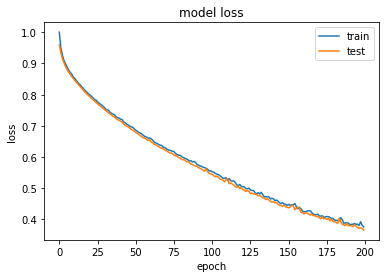

In [204]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [205]:
ave_acc_parking_ann=[]
ave_acc_parking_ann_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        model = create_model(X_train1.shape[1],y_train1.shape[1])
        history = model.fit(X_train1, y_train1,validation_data=(X_train1,y_train1),batch_size=512,epochs=300)
        score2 += model.evaluate(X_test1,y_test1,verbose=1)[1]
        score1 += model.evaluate(X_train1,y_train1,verbose=1)[1]
    ave_acc_parking_ann.append(score2/3.0)
    ave_acc_parking_ann_train.append(score1/3.0)
    
print ave_acc_parking_ann 
print ave_acc_parking_ann_train


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train on 28573 samples, validate on 28573 samples
Epoch 1/300
28573/28573 [==============================] - 3s 107us/step - loss: 3.2099 - acc: 0.0705 - val_loss: 3.0065 - val_acc: 0.1103
Epoch 2/300
28573/28573 [==============================] - 0s 14us/step - loss: 2.8391 - acc: 0.1292 - val_loss: 2.6821 - val_acc: 0.1723
Epoch 3/300
28573/28573 [==============================] - 0s 14us/step - loss: 2.5533 - acc: 0.1759 - val_loss: 2.4206 - val_acc: 0.2084
Epoch 4/300
28573/28573 [==============================] - 0s 14us/step - loss: 2.2949 - acc: 0.2774 - val_loss: 2.1650 - val_acc: 0.3180
Epoch 5/300
28573/28573 [==============================] - 0s 14us/step - loss: 2.0531 - acc: 0.3613 - val_loss: 1.9417 - val_acc: 0.3826
Epoch 6/300
28573/28573 [==============================] - 0s 14us/step - loss: 1.8531 - acc: 0.4185 - val_loss: 1.7650 - val_acc: 0.4295
Epoch 7/300
28573/28573 [==============================] - 0s 14us/step - loss: 1.6939 - acc: 0.4778 - val_loss: 1.6242 -

Epoch 118/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.2005 - acc: 0.9259 - val_loss: 0.1991 - val_acc: 0.9291
Epoch 119/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.1976 - acc: 0.9302 - val_loss: 0.1960 - val_acc: 0.9429
Epoch 120/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1972 - acc: 0.9303 - val_loss: 0.1996 - val_acc: 0.9214
Epoch 121/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.1956 - acc: 0.9316 - val_loss: 0.1940 - val_acc: 0.9329
Epoch 122/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.1941 - acc: 0.9325 - val_loss: 0.1919 - val_acc: 0.9403
Epoch 123/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.1929 - acc: 0.9328 - val_loss: 0.1944 - val_acc: 0.9281
Epoch 124/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1917 - acc: 0.9320 - val_loss: 0.1901 - val_acc: 0.9280
Epoch 125/300
28573/

28573/28573 [==============================] - 0s 15us/step - loss: 0.0924 - acc: 0.9776 - val_loss: 0.0922 - val_acc: 0.9777
Epoch 235/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.0924 - acc: 0.9768 - val_loss: 0.0933 - val_acc: 0.9742
Epoch 236/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0923 - acc: 0.9777 - val_loss: 0.0937 - val_acc: 0.9749
Epoch 237/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0922 - acc: 0.9768 - val_loss: 0.0894 - val_acc: 0.9783
Epoch 238/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0915 - acc: 0.9760 - val_loss: 0.0916 - val_acc: 0.9750
Epoch 239/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0902 - acc: 0.9772 - val_loss: 0.0920 - val_acc: 0.9760
Epoch 240/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0890 - acc: 0.9787 - val_loss: 0.0878 - val_acc: 0.9801
Epoch 241/300
28573/28573 [=======

Epoch 50/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4233 - acc: 0.8654 - val_loss: 0.4182 - val_acc: 0.8701
Epoch 51/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4160 - acc: 0.8683 - val_loss: 0.4131 - val_acc: 0.8726
Epoch 52/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4092 - acc: 0.8701 - val_loss: 0.4046 - val_acc: 0.8787
Epoch 53/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4029 - acc: 0.8755 - val_loss: 0.4028 - val_acc: 0.8785
Epoch 54/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3971 - acc: 0.8778 - val_loss: 0.3950 - val_acc: 0.8884
Epoch 55/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3908 - acc: 0.8804 - val_loss: 0.3880 - val_acc: 0.8737
Epoch 56/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3869 - acc: 0.8746 - val_loss: 0.3834 - val_acc: 0.8791
Epoch 57/300
28573/28573 [=

Epoch 109/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.2100 - acc: 0.9378 - val_loss: 0.2103 - val_acc: 0.9416
Epoch 110/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.2073 - acc: 0.9414 - val_loss: 0.2055 - val_acc: 0.9417
Epoch 111/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.2061 - acc: 0.9405 - val_loss: 0.2022 - val_acc: 0.9404
Epoch 112/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.2020 - acc: 0.9443 - val_loss: 0.1990 - val_acc: 0.9469
Epoch 113/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1998 - acc: 0.9459 - val_loss: 0.1998 - val_acc: 0.9444
Epoch 114/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1988 - acc: 0.9458 - val_loss: 0.1977 - val_acc: 0.9451
Epoch 115/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1963 - acc: 0.9475 - val_loss: 0.1972 - val_acc: 0.9518
Epoch 116/300
28573/

28573/28573 [==============================] - 0s 14us/step - loss: 0.0732 - acc: 0.9774 - val_loss: 0.0739 - val_acc: 0.9767
Epoch 226/300
28573/28573 [==============================] - 0s 13us/step - loss: 0.0732 - acc: 0.9778 - val_loss: 0.0726 - val_acc: 0.9767
Epoch 227/300
28573/28573 [==============================] - 0s 13us/step - loss: 0.0725 - acc: 0.9784 - val_loss: 0.0743 - val_acc: 0.9749
Epoch 228/300
28573/28573 [==============================] - 0s 13us/step - loss: 0.0720 - acc: 0.9779 - val_loss: 0.0708 - val_acc: 0.9789
Epoch 229/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0712 - acc: 0.9786 - val_loss: 0.0706 - val_acc: 0.9789
Epoch 230/300
28573/28573 [==============================] - 0s 13us/step - loss: 0.0717 - acc: 0.9773 - val_loss: 0.0706 - val_acc: 0.9782
Epoch 231/300
28573/28573 [==============================] - 0s 13us/step - loss: 0.0712 - acc: 0.9777 - val_loss: 0.0691 - val_acc: 0.9790
Epoch 232/300
28573/28573 [=======

Epoch 41/300
28573/28573 [==============================] - 0s 17us/step - loss: 0.4177 - acc: 0.8585 - val_loss: 0.4100 - val_acc: 0.8608
Epoch 42/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4090 - acc: 0.8618 - val_loss: 0.4039 - val_acc: 0.8628
Epoch 43/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.4015 - acc: 0.8638 - val_loss: 0.3942 - val_acc: 0.8656
Epoch 44/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3911 - acc: 0.8657 - val_loss: 0.3858 - val_acc: 0.8702
Epoch 45/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3845 - acc: 0.8674 - val_loss: 0.3781 - val_acc: 0.8667
Epoch 46/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3763 - acc: 0.8699 - val_loss: 0.3727 - val_acc: 0.8696
Epoch 47/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.3713 - acc: 0.8723 - val_loss: 0.3669 - val_acc: 0.8668
Epoch 48/300
28573/28573 [=

Epoch 100/300
28573/28573 [==============================] - 0s 16us/step - loss: 0.1985 - acc: 0.9310 - val_loss: 0.1951 - val_acc: 0.9392
Epoch 101/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1973 - acc: 0.9334 - val_loss: 0.2001 - val_acc: 0.9293
Epoch 102/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1949 - acc: 0.9304 - val_loss: 0.1927 - val_acc: 0.9340
Epoch 103/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1922 - acc: 0.9335 - val_loss: 0.1934 - val_acc: 0.9277
Epoch 104/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1913 - acc: 0.9343 - val_loss: 0.1901 - val_acc: 0.9271
Epoch 105/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9348 - val_loss: 0.1867 - val_acc: 0.9372
Epoch 106/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.1880 - acc: 0.9347 - val_loss: 0.1856 - val_acc: 0.9464
Epoch 107/300
28573/

28573/28573 [==============================] - 0s 14us/step - loss: 0.0702 - acc: 0.9938 - val_loss: 0.0685 - val_acc: 0.9958
Epoch 217/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0692 - acc: 0.9945 - val_loss: 0.0690 - val_acc: 0.9948
Epoch 218/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0683 - acc: 0.9944 - val_loss: 0.0669 - val_acc: 0.9951
Epoch 219/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0680 - acc: 0.9947 - val_loss: 0.0673 - val_acc: 0.9944
Epoch 220/300
28573/28573 [==============================] - 0s 15us/step - loss: 0.0687 - acc: 0.9930 - val_loss: 0.0679 - val_acc: 0.9951
Epoch 221/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0683 - acc: 0.9942 - val_loss: 0.0674 - val_acc: 0.9954
Epoch 222/300
28573/28573 [==============================] - 0s 14us/step - loss: 0.0665 - acc: 0.9943 - val_loss: 0.0664 - val_acc: 0.9922
Epoch 223/300
28573/28573 [=======

Epoch 32/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.8079 - acc: 0.7842 - val_loss: 0.7961 - val_acc: 0.7887
Epoch 33/300
17858/17858 [==============================] - 0s 18us/step - loss: 0.7872 - acc: 0.7961 - val_loss: 0.7732 - val_acc: 0.8013
Epoch 34/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.7673 - acc: 0.7996 - val_loss: 0.7550 - val_acc: 0.8178
Epoch 35/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.7480 - acc: 0.8108 - val_loss: 0.7381 - val_acc: 0.8080
Epoch 36/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.7307 - acc: 0.8022 - val_loss: 0.7194 - val_acc: 0.8113
Epoch 37/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.7137 - acc: 0.8037 - val_loss: 0.7068 - val_acc: 0.8059
Epoch 38/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.6989 - acc: 0.8042 - val_loss: 0.6878 - val_acc: 0.8050
Epoch 39/300
17858/17858 [=

17858/17858 [==============================] - 0s 14us/step - loss: 0.2196 - acc: 0.9329 - val_loss: 0.2196 - val_acc: 0.9465
Epoch 149/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.2186 - acc: 0.9307 - val_loss: 0.2164 - val_acc: 0.9369
Epoch 150/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2178 - acc: 0.9298 - val_loss: 0.2184 - val_acc: 0.9143
Epoch 151/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.2163 - acc: 0.9300 - val_loss: 0.2150 - val_acc: 0.9426
Epoch 152/300
17858/17858 [==============================] - 0s 17us/step - loss: 0.2135 - acc: 0.9363 - val_loss: 0.2144 - val_acc: 0.9235
Epoch 153/300
17858/17858 [==============================] - 0s 17us/step - loss: 0.2144 - acc: 0.9316 - val_loss: 0.2156 - val_acc: 0.9339
Epoch 154/300
17858/17858 [==============================] - 0s 17us/step - loss: 0.2115 - acc: 0.9321 - val_loss: 0.2085 - val_acc: 0.9469
Epoch 155/300
17858/17858 [=======

17858/17858 [==============================] - 0s 19us/step - loss: 0.1101 - acc: 0.9708 - val_loss: 0.1082 - val_acc: 0.9756
Epoch 265/300
17858/17858 [==============================] - 0s 20us/step - loss: 0.1102 - acc: 0.9709 - val_loss: 0.1102 - val_acc: 0.9658
Epoch 266/300
17858/17858 [==============================] - 0s 23us/step - loss: 0.1104 - acc: 0.9721 - val_loss: 0.1090 - val_acc: 0.9718
Epoch 267/300
17858/17858 [==============================] - 0s 19us/step - loss: 0.1092 - acc: 0.9707 - val_loss: 0.1069 - val_acc: 0.9751
Epoch 268/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.1080 - acc: 0.9726 - val_loss: 0.1072 - val_acc: 0.9727
Epoch 269/300
17858/17858 [==============================] - 0s 19us/step - loss: 0.1081 - acc: 0.9711 - val_loss: 0.1063 - val_acc: 0.9768
Epoch 270/300
17858/17858 [==============================] - 0s 20us/step - loss: 0.1079 - acc: 0.9708 - val_loss: 0.1078 - val_acc: 0.9724
Epoch 271/300
17858/17858 [=======

17858/17858 [==============================] - 0s 14us/step - loss: 0.3954 - acc: 0.8767 - val_loss: 0.3924 - val_acc: 0.8759
Epoch 81/300
17858/17858 [==============================] - 0s 17us/step - loss: 0.3908 - acc: 0.8781 - val_loss: 0.3882 - val_acc: 0.8855
Epoch 82/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.3861 - acc: 0.8794 - val_loss: 0.3853 - val_acc: 0.8718
Epoch 83/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.3844 - acc: 0.8794 - val_loss: 0.3804 - val_acc: 0.8764
Epoch 84/300
17858/17858 [==============================] - 0s 18us/step - loss: 0.3775 - acc: 0.8820 - val_loss: 0.3752 - val_acc: 0.8832
Epoch 85/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.3753 - acc: 0.8839 - val_loss: 0.3694 - val_acc: 0.8846
Epoch 86/300
17858/17858 [==============================] - 0s 17us/step - loss: 0.3706 - acc: 0.8820 - val_loss: 0.3678 - val_acc: 0.8813
Epoch 87/300
17858/17858 [==============

Epoch 139/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.2490 - acc: 0.9241 - val_loss: 0.2482 - val_acc: 0.9271
Epoch 140/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2487 - acc: 0.9217 - val_loss: 0.2506 - val_acc: 0.9241
Epoch 141/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2464 - acc: 0.9217 - val_loss: 0.2423 - val_acc: 0.9327
Epoch 142/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2442 - acc: 0.9252 - val_loss: 0.2438 - val_acc: 0.9252
Epoch 143/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2447 - acc: 0.9208 - val_loss: 0.2430 - val_acc: 0.9212
Epoch 144/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2423 - acc: 0.9270 - val_loss: 0.2402 - val_acc: 0.9316
Epoch 145/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.2406 - acc: 0.9247 - val_loss: 0.2396 - val_acc: 0.9134
Epoch 146/300
17858/

17858/17858 [==============================] - 0s 14us/step - loss: 0.1290 - acc: 0.9633 - val_loss: 0.1302 - val_acc: 0.9623
Epoch 256/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1293 - acc: 0.9624 - val_loss: 0.1272 - val_acc: 0.9659
Epoch 257/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.1277 - acc: 0.9632 - val_loss: 0.1274 - val_acc: 0.9634
Epoch 258/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1267 - acc: 0.9628 - val_loss: 0.1262 - val_acc: 0.9646
Epoch 259/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1261 - acc: 0.9632 - val_loss: 0.1258 - val_acc: 0.9629
Epoch 260/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1241 - acc: 0.9644 - val_loss: 0.1245 - val_acc: 0.9642
Epoch 261/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1247 - acc: 0.9640 - val_loss: 0.1240 - val_acc: 0.9632
Epoch 262/300
17858/17858 [=======

17858/17858 [==============================] - 0s 17us/step - loss: 0.4345 - acc: 0.8695 - val_loss: 0.4299 - val_acc: 0.8802
Epoch 72/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.4304 - acc: 0.8699 - val_loss: 0.4244 - val_acc: 0.8662
Epoch 73/300
17858/17858 [==============================] - 0s 16us/step - loss: 0.4230 - acc: 0.8733 - val_loss: 0.4196 - val_acc: 0.8737
Epoch 74/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.4205 - acc: 0.8790 - val_loss: 0.4186 - val_acc: 0.8740
Epoch 75/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.4176 - acc: 0.8713 - val_loss: 0.4105 - val_acc: 0.8751
Epoch 76/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.4112 - acc: 0.8798 - val_loss: 0.4077 - val_acc: 0.8765
Epoch 77/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.4063 - acc: 0.8801 - val_loss: 0.4032 - val_acc: 0.8748
Epoch 78/300
17858/17858 [==============

17858/17858 [==============================] - 0s 15us/step - loss: 0.1725 - acc: 0.9561 - val_loss: 0.1761 - val_acc: 0.9505
Epoch 188/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1720 - acc: 0.9541 - val_loss: 0.1701 - val_acc: 0.9573
Epoch 189/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1726 - acc: 0.9555 - val_loss: 0.1695 - val_acc: 0.9572
Epoch 190/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1711 - acc: 0.9564 - val_loss: 0.1722 - val_acc: 0.9514
Epoch 191/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1722 - acc: 0.9559 - val_loss: 0.1683 - val_acc: 0.9561
Epoch 192/300
17858/17858 [==============================] - 0s 14us/step - loss: 0.1682 - acc: 0.9582 - val_loss: 0.1678 - val_acc: 0.9568
Epoch 193/300
17858/17858 [==============================] - 0s 15us/step - loss: 0.1673 - acc: 0.9567 - val_loss: 0.1686 - val_acc: 0.9564
Epoch 194/300
17858/17858 [=======

7143/7143 [==============================] - 0s 16us/step - loss: 3.2582 - acc: 0.0825 - val_loss: 3.2088 - val_acc: 0.0881
Epoch 3/300
7143/7143 [==============================] - 0s 15us/step - loss: 3.1633 - acc: 0.0962 - val_loss: 3.1054 - val_acc: 0.1089
Epoch 4/300
7143/7143 [==============================] - 0s 15us/step - loss: 3.0533 - acc: 0.1176 - val_loss: 2.9914 - val_acc: 0.1222
Epoch 5/300
7143/7143 [==============================] - 0s 15us/step - loss: 2.9395 - acc: 0.1184 - val_loss: 2.8806 - val_acc: 0.1100
Epoch 6/300
7143/7143 [==============================] - 0s 15us/step - loss: 2.8347 - acc: 0.1074 - val_loss: 2.7840 - val_acc: 0.1072
Epoch 7/300
7143/7143 [==============================] - 0s 15us/step - loss: 2.7461 - acc: 0.1092 - val_loss: 2.7028 - val_acc: 0.1120
Epoch 8/300
7143/7143 [==============================] - 0s 15us/step - loss: 2.6702 - acc: 0.1512 - val_loss: 2.6320 - val_acc: 0.1744
Epoch 9/300
7143/7143 [==============================] - 0s 

Epoch 62/300
7143/7143 [==============================] - 0s 17us/step - loss: 0.9897 - acc: 0.7504 - val_loss: 0.9804 - val_acc: 0.7568
Epoch 63/300
7143/7143 [==============================] - 0s 20us/step - loss: 0.9781 - acc: 0.7473 - val_loss: 0.9691 - val_acc: 0.7360
Epoch 64/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.9649 - acc: 0.7574 - val_loss: 0.9565 - val_acc: 0.7687
Epoch 65/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9537 - acc: 0.7610 - val_loss: 0.9465 - val_acc: 0.7588
Epoch 66/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9420 - acc: 0.7612 - val_loss: 0.9339 - val_acc: 0.7717
Epoch 67/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9325 - acc: 0.7764 - val_loss: 0.9234 - val_acc: 0.7586
Epoch 68/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9206 - acc: 0.7641 - val_loss: 0.9123 - val_acc: 0.7766
Epoch 69/300
7143/7143 [=================

7143/7143 [==============================] - 0s 16us/step - loss: 0.4149 - acc: 0.8669 - val_loss: 0.4132 - val_acc: 0.8701
Epoch 181/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4145 - acc: 0.8674 - val_loss: 0.4122 - val_acc: 0.8706
Epoch 182/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.4127 - acc: 0.8663 - val_loss: 0.4087 - val_acc: 0.8741
Epoch 183/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4102 - acc: 0.8676 - val_loss: 0.4075 - val_acc: 0.8685
Epoch 184/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4095 - acc: 0.8698 - val_loss: 0.4057 - val_acc: 0.8708
Epoch 185/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4071 - acc: 0.8669 - val_loss: 0.4059 - val_acc: 0.8744
Epoch 186/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.4045 - acc: 0.8726 - val_loss: 0.4006 - val_acc: 0.8732
Epoch 187/300
7143/7143 [=======================

7143/7143 [==============================] - 0s 16us/step - loss: 0.2785 - acc: 0.9058 - val_loss: 0.2747 - val_acc: 0.9107
Epoch 299/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2769 - acc: 0.9066 - val_loss: 0.2743 - val_acc: 0.9101
Epoch 300/300
7143/7143 [==============================] - 0s 67us/step
Train on 7143 samples, validate on 7143 samples
Epoch 1/300
7143/7143 [==============================] - 3s 434us/step - loss: 3.3789 - acc: 0.0627 - val_loss: 3.3402 - val_acc: 0.0687
Epoch 2/300
7143/7143 [==============================] - 0s 16us/step - loss: 3.3049 - acc: 0.0795 - val_loss: 3.2616 - val_acc: 0.0944
Epoch 3/300
7143/7143 [==============================] - 0s 15us/step - loss: 3.2210 - acc: 0.1154 - val_loss: 3.1703 - val_acc: 0.1246
Epoch 4/300
7143/7143 [==============================] - 0s 15us/step - loss: 3.1218 - acc: 0.1212 - val_loss: 3.0629 - val_acc: 0.1194
Epoch 5/300
7143/7143 [==============================] - 0s 15us/step - l

Epoch 57/300
7143/7143 [==============================] - 0s 16us/step - loss: 1.0418 - acc: 0.7379 - val_loss: 1.0332 - val_acc: 0.7353
Epoch 58/300
7143/7143 [==============================] - 0s 15us/step - loss: 1.0294 - acc: 0.7322 - val_loss: 1.0206 - val_acc: 0.7388
Epoch 59/300
7143/7143 [==============================] - 0s 15us/step - loss: 1.0170 - acc: 0.7411 - val_loss: 1.0079 - val_acc: 0.7466
Epoch 60/300
7143/7143 [==============================] - 0s 16us/step - loss: 1.0052 - acc: 0.7347 - val_loss: 0.9963 - val_acc: 0.7379
Epoch 61/300
7143/7143 [==============================] - 0s 17us/step - loss: 0.9918 - acc: 0.7375 - val_loss: 0.9831 - val_acc: 0.7612
Epoch 62/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9798 - acc: 0.7546 - val_loss: 0.9701 - val_acc: 0.7543
Epoch 63/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.9682 - acc: 0.7544 - val_loss: 0.9581 - val_acc: 0.7677
Epoch 64/300
7143/7143 [=================

7143/7143 [==============================] - 0s 16us/step - loss: 0.4067 - acc: 0.8660 - val_loss: 0.4059 - val_acc: 0.8739
Epoch 176/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4052 - acc: 0.8708 - val_loss: 0.4017 - val_acc: 0.8660
Epoch 177/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4044 - acc: 0.8653 - val_loss: 0.4031 - val_acc: 0.8657
Epoch 178/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.4019 - acc: 0.8628 - val_loss: 0.3973 - val_acc: 0.8723
Epoch 179/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.3981 - acc: 0.8706 - val_loss: 0.3951 - val_acc: 0.8709
Epoch 180/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.3962 - acc: 0.8690 - val_loss: 0.3931 - val_acc: 0.8713
Epoch 181/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.3952 - acc: 0.8730 - val_loss: 0.3933 - val_acc: 0.8706
Epoch 182/300
7143/7143 [=======================

7143/7143 [==============================] - 0s 15us/step - loss: 0.2590 - acc: 0.9082 - val_loss: 0.2575 - val_acc: 0.9107
Epoch 294/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2581 - acc: 0.9104 - val_loss: 0.2565 - val_acc: 0.9188
Epoch 295/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.2580 - acc: 0.9098 - val_loss: 0.2598 - val_acc: 0.9171
Epoch 296/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2600 - acc: 0.9065 - val_loss: 0.2568 - val_acc: 0.9101
Epoch 297/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2566 - acc: 0.9093 - val_loss: 0.2542 - val_acc: 0.9129
Epoch 298/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2555 - acc: 0.9087 - val_loss: 0.2522 - val_acc: 0.9139
Epoch 299/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.2545 - acc: 0.9090 - val_loss: 0.2524 - val_acc: 0.9119
Epoch 300/300
7143/7143 [=======================

Epoch 52/300
7143/7143 [==============================] - 0s 14us/step - loss: 1.0347 - acc: 0.7262 - val_loss: 1.0249 - val_acc: 0.7287
Epoch 53/300
7143/7143 [==============================] - 0s 14us/step - loss: 1.0211 - acc: 0.7442 - val_loss: 1.0104 - val_acc: 0.7271
Epoch 54/300
7143/7143 [==============================] - 0s 22us/step - loss: 1.0073 - acc: 0.7204 - val_loss: 0.9978 - val_acc: 0.7428
Epoch 55/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.9944 - acc: 0.7446 - val_loss: 0.9851 - val_acc: 0.7458
Epoch 56/300
7143/7143 [==============================] - 0s 15us/step - loss: 0.9804 - acc: 0.7459 - val_loss: 0.9709 - val_acc: 0.7395
Epoch 57/300
7143/7143 [==============================] - 0s 36us/step - loss: 0.9683 - acc: 0.7389 - val_loss: 0.9584 - val_acc: 0.7437
Epoch 58/300
7143/7143 [==============================] - 0s 19us/step - loss: 0.9554 - acc: 0.7472 - val_loss: 0.9461 - val_acc: 0.7558
Epoch 59/300
7143/7143 [=================

Epoch 112/300
7143/7143 [==============================] - 0s 19us/step - loss: 0.5741 - acc: 0.8307 - val_loss: 0.5703 - val_acc: 0.8243
Epoch 113/300
7143/7143 [==============================] - 0s 17us/step - loss: 0.5710 - acc: 0.8296 - val_loss: 0.5674 - val_acc: 0.8324
Epoch 114/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.5661 - acc: 0.8354 - val_loss: 0.5608 - val_acc: 0.8358
Epoch 115/300
7143/7143 [==============================] - 0s 21us/step - loss: 0.5618 - acc: 0.8324 - val_loss: 0.5575 - val_acc: 0.8348
Epoch 116/300
7143/7143 [==============================] - 0s 23us/step - loss: 0.5593 - acc: 0.8365 - val_loss: 0.5554 - val_acc: 0.8333
Epoch 117/300
7143/7143 [==============================] - 0s 19us/step - loss: 0.5536 - acc: 0.8345 - val_loss: 0.5501 - val_acc: 0.8387
Epoch 118/300
7143/7143 [==============================] - 0s 20us/step - loss: 0.5508 - acc: 0.8359 - val_loss: 0.5466 - val_acc: 0.8379
Epoch 119/300
7143/7143 [=========

7143/7143 [==============================] - 0s 16us/step - loss: 0.3186 - acc: 0.8916 - val_loss: 0.3162 - val_acc: 0.9016
Epoch 231/300
7143/7143 [==============================] - 0s 16us/step - loss: 0.3177 - acc: 0.8953 - val_loss: 0.3130 - val_acc: 0.9041
Epoch 232/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.3137 - acc: 0.8995 - val_loss: 0.3120 - val_acc: 0.8933
Epoch 233/300
7143/7143 [==============================] - 0s 17us/step - loss: 0.3121 - acc: 0.8986 - val_loss: 0.3125 - val_acc: 0.8970
Epoch 234/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.3132 - acc: 0.8954 - val_loss: 0.3108 - val_acc: 0.9079
Epoch 235/300
7143/7143 [==============================] - 0s 17us/step - loss: 0.3105 - acc: 0.8991 - val_loss: 0.3100 - val_acc: 0.8985
Epoch 236/300
7143/7143 [==============================] - 0s 18us/step - loss: 0.3110 - acc: 0.8957 - val_loss: 0.3075 - val_acc: 0.9002
Epoch 237/300
7143/7143 [=======================

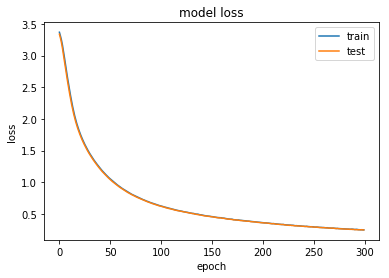

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [235]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=5))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
    
ave_acc_occ_ann=[]
ave_acc_occ_ann_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        history = model.fit(X_train1, y_train1,validation_data=(X_train1,y_train1),batch_size=32,epochs=50)
        score2 += model.evaluate(X_test1,y_test1,verbose=1)[1]
        score1 += model.evaluate(X_train1,y_train1,verbose=1)[1]
    ave_acc_occ_ann.append(score2/3.0)
    ave_acc_occ_ann_train.append(score1/3.0)
    
print ave_acc_occ_ann  
print ave_acc_occ_ann_train

Train on 6514 samples, validate on 6514 samples
Epoch 1/50
6514/6514 [==============================] - 10s 2ms/step - loss: 0.6700 - acc: 0.5940 - val_loss: 0.4733 - val_acc: 0.9088
Epoch 2/50
6514/6514 [==============================] - 1s 212us/step - loss: 0.3507 - acc: 0.9372 - val_loss: 0.2552 - val_acc: 0.9553
Epoch 3/50
6514/6514 [==============================] - 1s 202us/step - loss: 0.1997 - acc: 0.9619 - val_loss: 0.1554 - val_acc: 0.9691
Epoch 4/50
6514/6514 [==============================] - 1s 185us/step - loss: 0.1282 - acc: 0.9725 - val_loss: 0.1057 - val_acc: 0.9757
Epoch 5/50
6514/6514 [==============================] - 1s 193us/step - loss: 0.0922 - acc: 0.9785 - val_loss: 0.0809 - val_acc: 0.9814
Epoch 6/50
6514/6514 [==============================] - 1s 190us/step - loss: 0.0741 - acc: 0.9819 - val_loss: 0.0682 - val_acc: 0.9836
Epoch 7/50
6514/6514 [==============================] - 1s 218us/step - loss: 0.0646 - acc: 0.9837 - val_loss: 0.0613 - val_acc: 0.9845
E

Epoch 18/50
6514/6514 [==============================] - 1s 171us/step - loss: 0.0270 - acc: 0.9897 - val_loss: 0.0267 - val_acc: 0.9900
Epoch 19/50
6514/6514 [==============================] - 1s 173us/step - loss: 0.0270 - acc: 0.9897 - val_loss: 0.0270 - val_acc: 0.9893
Epoch 20/50
6514/6514 [==============================] - 1s 174us/step - loss: 0.0269 - acc: 0.9897 - val_loss: 0.0266 - val_acc: 0.9902
Epoch 21/50
6514/6514 [==============================] - 1s 189us/step - loss: 0.0269 - acc: 0.9899 - val_loss: 0.0266 - val_acc: 0.9902
Epoch 22/50
6514/6514 [==============================] - 1s 177us/step - loss: 0.0268 - acc: 0.9897 - val_loss: 0.0265 - val_acc: 0.9900
Epoch 23/50
6514/6514 [==============================] - 1s 177us/step - loss: 0.0269 - acc: 0.9900 - val_loss: 0.0264 - val_acc: 0.9902
Epoch 24/50
6514/6514 [==============================] - 1s 166us/step - loss: 0.0265 - acc: 0.9900 - val_loss: 0.0264 - val_acc: 0.9900
Epoch 25/50
6514/6514 [==================

Epoch 35/50
4071/4071 [==============================] - 1s 193us/step - loss: 0.0270 - acc: 0.9902 - val_loss: 0.0265 - val_acc: 0.9904
Epoch 36/50
4071/4071 [==============================] - 1s 212us/step - loss: 0.0268 - acc: 0.9902 - val_loss: 0.0267 - val_acc: 0.9904
Epoch 37/50
4071/4071 [==============================] - 1s 189us/step - loss: 0.0267 - acc: 0.9907 - val_loss: 0.0265 - val_acc: 0.9904
Epoch 38/50
4071/4071 [==============================] - 1s 206us/step - loss: 0.0268 - acc: 0.9902 - val_loss: 0.0266 - val_acc: 0.9904
Epoch 39/50
4071/4071 [==============================] - 1s 181us/step - loss: 0.0269 - acc: 0.9904 - val_loss: 0.0264 - val_acc: 0.9904
Epoch 40/50
4071/4071 [==============================] - 1s 192us/step - loss: 0.0267 - acc: 0.9902 - val_loss: 0.0264 - val_acc: 0.9902
Epoch 41/50
4071/4071 [==============================] - 1s 179us/step - loss: 0.0268 - acc: 0.9904 - val_loss: 0.0264 - val_acc: 0.9904
Epoch 42/50
4071/4071 [==================

1628/1628 [==============================] - 0s 80us/step
Train on 1628 samples, validate on 1628 samples
Epoch 1/50
1628/1628 [==============================] - 0s 188us/step - loss: 0.0240 - acc: 0.9914 - val_loss: 0.0231 - val_acc: 0.9902
Epoch 2/50
1628/1628 [==============================] - 0s 172us/step - loss: 0.0234 - acc: 0.9902 - val_loss: 0.0229 - val_acc: 0.9902
Epoch 3/50
1628/1628 [==============================] - 0s 167us/step - loss: 0.0233 - acc: 0.9914 - val_loss: 0.0227 - val_acc: 0.9902
Epoch 4/50
1628/1628 [==============================] - 0s 181us/step - loss: 0.0230 - acc: 0.9908 - val_loss: 0.0226 - val_acc: 0.9902
Epoch 5/50
1628/1628 [==============================] - 0s 183us/step - loss: 0.0228 - acc: 0.9914 - val_loss: 0.0225 - val_acc: 0.9908
Epoch 6/50
1628/1628 [==============================] - 0s 172us/step - loss: 0.0229 - acc: 0.9908 - val_loss: 0.0224 - val_acc: 0.9908
Epoch 7/50
1628/1628 [==============================] - 0s 172us/step - loss: 

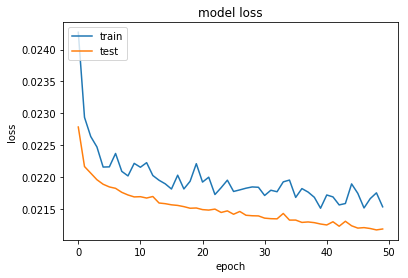

In [236]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [237]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=3))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
ave_acc_act_ann=[]
ave_acc_act_ann_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        history = model.fit(X_train1, y_train1,validation_data=(X_train1,y_train1),batch_size=512,epochs=100)
        score2 += model.evaluate(X_test1,y_test1,verbose=1)[1]
        score1 += model.evaluate(X_train1,y_train1,verbose=1)[1]
    ave_acc_act_ann.append(score2/3.0)
    ave_acc_act_ann_train.append(score1/3.0)
    
print ave_acc_act_ann  
print ave_acc_act_ann_train


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


Train on 130000 samples, validate on 130000 samples
Epoch 1/100
130000/130000 [==============================] - 6s 47us/step - loss: 0.2552 - acc: 0.9624 - val_loss: 0.1409 - val_acc: 0.9749
Epoch 2/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.1223 - acc: 0.9749 - val_loss: 0.1102 - val_acc: 0.9749
Epoch 3/100
130000/130000 [==============================] - 2s 12us/step - loss: 0.1041 - acc: 0.9749 - val_loss: 0.0994 - val_acc: 0.9749
Epoch 4/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0969 - acc: 0.9750 - val_loss: 0.0948 - val_acc: 0.9750
Epoch 5/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0937 - acc: 0.9752 - val_loss: 0.0926 - val_acc: 0.9752
Epoch 6/100
130000/130000 [==============================] - 2s 12us/step - loss: 0.0919 - acc: 0.9754 - val_loss: 0.0912 - val_acc: 0.9754
Epoch 7/100
130000/130000 [==============================] - 2s 14us/step - loss: 0.0907 - acc: 0.9754 - val

Epoch 59/100
130000/130000 [==============================] - 1s 11us/step - loss: 0.0807 - acc: 0.9764 - val_loss: 0.0805 - val_acc: 0.9765
Epoch 60/100
130000/130000 [==============================] - 1s 10us/step - loss: 0.0807 - acc: 0.9765 - val_loss: 0.0805 - val_acc: 0.9764
Epoch 61/100
130000/130000 [==============================] - 1s 10us/step - loss: 0.0806 - acc: 0.9764 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 62/100
130000/130000 [==============================] - 1s 11us/step - loss: 0.0807 - acc: 0.9764 - val_loss: 0.0806 - val_acc: 0.9765
Epoch 63/100
130000/130000 [==============================] - 1s 11us/step - loss: 0.0806 - acc: 0.9764 - val_loss: 0.0803 - val_acc: 0.9766
Epoch 64/100
130000/130000 [==============================] - 1s 10us/step - loss: 0.0805 - acc: 0.9766 - val_loss: 0.0807 - val_acc: 0.9763
Epoch 65/100
130000/130000 [==============================] - 1s 11us/step - loss: 0.0805 - acc: 0.9765 - val_loss: 0.0803 - val_acc: 0.9766
Epoch 66/100


Epoch 16/100
130000/130000 [==============================] - 2s 19us/step - loss: 0.0794 - acc: 0.9763 - val_loss: 0.0794 - val_acc: 0.9766
Epoch 17/100
130000/130000 [==============================] - 2s 16us/step - loss: 0.0794 - acc: 0.9764 - val_loss: 0.0792 - val_acc: 0.9764
Epoch 18/100
130000/130000 [==============================] - 2s 19us/step - loss: 0.0794 - acc: 0.9764 - val_loss: 0.0793 - val_acc: 0.9764
Epoch 19/100
130000/130000 [==============================] - 2s 16us/step - loss: 0.0794 - acc: 0.9763 - val_loss: 0.0792 - val_acc: 0.9765
Epoch 20/100
130000/130000 [==============================] - 2s 17us/step - loss: 0.0793 - acc: 0.9764 - val_loss: 0.0793 - val_acc: 0.9765
Epoch 21/100
130000/130000 [==============================] - 2s 14us/step - loss: 0.0794 - acc: 0.9765 - val_loss: 0.0795 - val_acc: 0.9766
Epoch 22/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0793 - acc: 0.9764 - val_loss: 0.0793 - val_acc: 0.9765
Epoch 23/100


130000/130000 [==============================] - 2s 13us/step - loss: 0.0786 - acc: 0.9765 - val_loss: 0.0785 - val_acc: 0.9768
Epoch 32/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0787 - acc: 0.9766 - val_loss: 0.0786 - val_acc: 0.9764
Epoch 33/100
130000/130000 [==============================] - 2s 12us/step - loss: 0.0787 - acc: 0.9766 - val_loss: 0.0786 - val_acc: 0.9767
Epoch 34/100
130000/130000 [==============================] - 2s 15us/step - loss: 0.0786 - acc: 0.9766 - val_loss: 0.0785 - val_acc: 0.9767
Epoch 35/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0788 - acc: 0.9765 - val_loss: 0.0786 - val_acc: 0.9764
Epoch 36/100
130000/130000 [==============================] - 2s 12us/step - loss: 0.0786 - acc: 0.9765 - val_loss: 0.0786 - val_acc: 0.9765
Epoch 37/100
130000/130000 [==============================] - 2s 13us/step - loss: 0.0787 - acc: 0.9766 - val_loss: 0.0784 - val_acc: 0.9765
Epoch 38/100
130000/130000

81250/81250 [==============================] - 1s 18us/step - loss: 0.0800 - acc: 0.9760 - val_loss: 0.0797 - val_acc: 0.9759
Epoch 47/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0799 - acc: 0.9759 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 48/100
81250/81250 [==============================] - 1s 13us/step - loss: 0.0800 - acc: 0.9759 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 49/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0799 - acc: 0.9760 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 50/100
81250/81250 [==============================] - 1s 14us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0797 - val_acc: 0.9761
Epoch 51/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0798 - acc: 0.9758 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 52/100
81250/81250 [==============================] - 1s 14us/step - loss: 0.0800 - acc: 0.9759 - val_loss: 0.0798 - val_acc: 0.9761
Epoch 53/100
81250/81250 [==============

Epoch 4/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0801 - acc: 0.9763 - val_loss: 0.0799 - val_acc: 0.9763
Epoch 5/100
81250/81250 [==============================] - 1s 13us/step - loss: 0.0800 - acc: 0.9763 - val_loss: 0.0798 - val_acc: 0.9762
Epoch 6/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0800 - acc: 0.9760 - val_loss: 0.0797 - val_acc: 0.9762
Epoch 7/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0800 - acc: 0.9762 - val_loss: 0.0797 - val_acc: 0.9762
Epoch 8/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0800 - acc: 0.9762 - val_loss: 0.0798 - val_acc: 0.9762
Epoch 9/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0799 - acc: 0.9762 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 10/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0799 - acc: 0.9763 - val_loss: 0.0796 - val_acc: 0.9761
Epoch 11/100
81250/81250 [=======

Epoch 63/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0796 - acc: 0.9761 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 64/100
81250/81250 [==============================] - 1s 13us/step - loss: 0.0797 - acc: 0.9761 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 65/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0797 - acc: 0.9762 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 66/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0796 - acc: 0.9761 - val_loss: 0.0796 - val_acc: 0.9762
Epoch 67/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0796 - acc: 0.9762 - val_loss: 0.0797 - val_acc: 0.9764
Epoch 68/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0796 - acc: 0.9764 - val_loss: 0.0793 - val_acc: 0.9764
Epoch 69/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0796 - acc: 0.9764 - val_loss: 0.0793 - val_acc: 0.9763
Epoch 70/100
81250/81250 [=

Epoch 21/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 22/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0803 - acc: 0.9761 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 23/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0803 - acc: 0.9760 - val_loss: 0.0799 - val_acc: 0.9761
Epoch 24/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0802 - acc: 0.9759 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 25/100
81250/81250 [==============================] - 1s 12us/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.0805 - val_acc: 0.9763
Epoch 26/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0802 - acc: 0.9761 - val_loss: 0.0802 - val_acc: 0.9759
Epoch 27/100
81250/81250 [==============================] - 1s 10us/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.0806 - val_acc: 0.9762
Epoch 28/100
81250/81250 [=

Epoch 80/100
81250/81250 [==============================] - 1s 11us/step - loss: 0.0800 - acc: 0.9761 - val_loss: 0.0798 - val_acc: 0.9761
Epoch 81/100
81250/81250 [==============================] - 1s 14us/step - loss: 0.0800 - acc: 0.9761 - val_loss: 0.0798 - val_acc: 0.9762
Epoch 82/100
81250/81250 [==============================] - 1s 18us/step - loss: 0.0800 - acc: 0.9760 - val_loss: 0.0799 - val_acc: 0.9763
Epoch 83/100
81250/81250 [==============================] - 1s 16us/step - loss: 0.0801 - acc: 0.9762 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 84/100
81250/81250 [==============================] - 1s 17us/step - loss: 0.0800 - acc: 0.9758 - val_loss: 0.0802 - val_acc: 0.9762
Epoch 85/100
81250/81250 [==============================] - 1s 13us/step - loss: 0.0800 - acc: 0.9761 - val_loss: 0.0798 - val_acc: 0.9762
Epoch 86/100
81250/81250 [==============================] - 1s 15us/step - loss: 0.0799 - acc: 0.9760 - val_loss: 0.0800 - val_acc: 0.9757
Epoch 87/100
81250/81250 [=

Epoch 38/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0789 - acc: 0.9766 - val_loss: 0.0787 - val_acc: 0.9769
Epoch 39/100
32500/32500 [==============================] - 0s 13us/step - loss: 0.0789 - acc: 0.9765 - val_loss: 0.0786 - val_acc: 0.9769
Epoch 40/100
32500/32500 [==============================] - 0s 13us/step - loss: 0.0788 - acc: 0.9766 - val_loss: 0.0787 - val_acc: 0.9769
Epoch 41/100
32500/32500 [==============================] - 1s 18us/step - loss: 0.0789 - acc: 0.9767 - val_loss: 0.0785 - val_acc: 0.9767
Epoch 42/100
32500/32500 [==============================] - 1s 16us/step - loss: 0.0788 - acc: 0.9767 - val_loss: 0.0789 - val_acc: 0.9770
Epoch 43/100
32500/32500 [==============================] - 0s 13us/step - loss: 0.0790 - acc: 0.9767 - val_loss: 0.0786 - val_acc: 0.9768
Epoch 44/100
32500/32500 [==============================] - 1s 15us/step - loss: 0.0790 - acc: 0.9766 - val_loss: 0.0786 - val_acc: 0.9766
Epoch 45/100
32500/32500 [=

Epoch 97/100
32500/32500 [==============================] - 0s 14us/step - loss: 0.0786 - acc: 0.9767 - val_loss: 0.0783 - val_acc: 0.9766
Epoch 98/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0787 - acc: 0.9767 - val_loss: 0.0783 - val_acc: 0.9769
Epoch 99/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0787 - acc: 0.9767 - val_loss: 0.0783 - val_acc: 0.9767
Epoch 100/100
32500/32500 [==============================] - 2s 70us/step
Train on 32500 samples, validate on 32500 samples
Epoch 1/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0809 - acc: 0.9757 - val_loss: 0.0808 - val_acc: 0.9757
Epoch 2/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0807 - acc: 0.9757 - val_loss: 0.0806 - val_acc: 0.9758
Epoch 3/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0808 - acc: 0.9758 - val_loss: 0.0808 - val_acc: 0.9762
Epoch 4/100
32500/32500 [====================

Epoch 55/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0797 - acc: 0.9757 - val_loss: 0.0794 - val_acc: 0.9762
Epoch 56/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0795 - acc: 0.9758 - val_loss: 0.0793 - val_acc: 0.9758
Epoch 57/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0796 - acc: 0.9760 - val_loss: 0.0793 - val_acc: 0.9757
Epoch 58/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0796 - acc: 0.9760 - val_loss: 0.0794 - val_acc: 0.9757
Epoch 59/100
32500/32500 [==============================] - 0s 13us/step - loss: 0.0795 - acc: 0.9758 - val_loss: 0.0792 - val_acc: 0.9757
Epoch 60/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0794 - acc: 0.9757 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 61/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0796 - acc: 0.9758 - val_loss: 0.0796 - val_acc: 0.9755
Epoch 62/100
32500/32500 [=

Epoch 13/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0775 - acc: 0.9761 - val_loss: 0.0772 - val_acc: 0.9759
Epoch 14/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0773 - acc: 0.9759 - val_loss: 0.0770 - val_acc: 0.9758
Epoch 15/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0773 - acc: 0.9762 - val_loss: 0.0769 - val_acc: 0.9759
Epoch 16/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0773 - acc: 0.9759 - val_loss: 0.0769 - val_acc: 0.9761
Epoch 17/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0773 - acc: 0.9758 - val_loss: 0.0769 - val_acc: 0.9760
Epoch 18/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0774 - acc: 0.9760 - val_loss: 0.0770 - val_acc: 0.9762
Epoch 19/100
32500/32500 [==============================] - 0s 12us/step - loss: 0.0771 - acc: 0.9763 - val_loss: 0.0770 - val_acc: 0.9761
Epoch 20/100
32500/32500 [=

Epoch 72/100
32500/32500 [==============================] - 0s 10us/step - loss: 0.0765 - acc: 0.9764 - val_loss: 0.0762 - val_acc: 0.9762
Epoch 73/100
32500/32500 [==============================] - 0s 10us/step - loss: 0.0764 - acc: 0.9763 - val_loss: 0.0765 - val_acc: 0.9762
Epoch 74/100
32500/32500 [==============================] - 0s 10us/step - loss: 0.0764 - acc: 0.9762 - val_loss: 0.0761 - val_acc: 0.9762
Epoch 75/100
32500/32500 [==============================] - 0s 10us/step - loss: 0.0764 - acc: 0.9763 - val_loss: 0.0767 - val_acc: 0.9761
Epoch 76/100
32500/32500 [==============================] - 0s 10us/step - loss: 0.0764 - acc: 0.9761 - val_loss: 0.0762 - val_acc: 0.9762
Epoch 77/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0763 - acc: 0.9765 - val_loss: 0.0765 - val_acc: 0.9760
Epoch 78/100
32500/32500 [==============================] - 0s 11us/step - loss: 0.0764 - acc: 0.9763 - val_loss: 0.0760 - val_acc: 0.9764
Epoch 79/100
32500/32500 [=

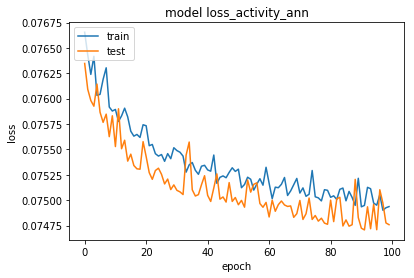

In [210]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_activity_ann')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Boosting 

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#parameter = [{'learning_rate':[0.01,0.1,0.3],'n_estimators':[100,200,500]}]
parameter = [{'learning_rate':[0.1],'n_estimators':[100,200]}]
search = GridSearchCV(clf,parameter,cv=3)
search.fit(Act_x,Act_y)
print search.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}


In [212]:
clf = GradientBoostingClassifier(learning_rate=search.best_params_['learning_rate'],n_estimators=search.best_params_['n_estimators'],)
ave_acc_activity_boo = []
ave_acc_activity_boo_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1,y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_activity_boo_train.append(score1/3.0)
    ave_acc_activity_boo.append(score2/3.0)
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [213]:
print ave_acc_activity_boo
print ave_acc_activity_boo_train

[0.9773545429371403, 0.9768290031302179, 0.9763360794660554]
[0.9778846153846154, 0.9784205128205129, 0.9797128205128205]


In [214]:
search.fit(occ_x,occ_y)
print search.best_params_
clf = GradientBoostingClassifier(learning_rate=search.best_params_['learning_rate'],n_estimators=search.best_params_['n_estimators'])
ave_acc_occ_boo = []
ave_acc_occ_boo_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_occ_boo_train.append(score1/3.0)
    ave_acc_occ_boo.append(score2/3.0)

{'n_estimators': 100, 'learning_rate': 0.1}


In [215]:
print ave_acc_occ_boo
print ave_acc_occ_boo_train

[0.992633517495396, 0.9939423706614275, 0.9903300076745971]
[0.9983113294442739, 0.9986080406124621, 0.9995904995904996]


In [216]:
search.fit(Whole_x,Whole_y)
print search.best_params_
clf = GradientBoostingClassifier(learning_rate=search.best_params_['learning_rate'],n_estimators=search.best_params_['n_estimators'])
ave_acc_whole_boo = []
ave_acc_whole_boo_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_whole_boo_train.append(score1/3.0)
    ave_acc_whole_boo.append(score2/3.0)
    

{'n_estimators': 100, 'learning_rate': 0.1}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [217]:
print ave_acc_whole_boo
print ave_acc_whole_boo_train

[0.9204545454545454, 0.9166666666666666, 0.8882575757575758]
[0.9990530303030303, 1.0, 1.0]


In [218]:
search.fit(eva_x,Instr)
print search.best_params_
clf = GradientBoostingClassifier(learning_rate=search.best_params_['learning_rate'],n_estimators=search.best_params_['n_estimators'])
ave_acc_eva_boo=[]
ave_acc_eva_boo_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, Instr, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_eva_boo_train.append(score1/3.0)
    ave_acc_eva_boo.append(score2/3.0)
    

{'n_estimators': 100, 'learning_rate': 0.1}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [219]:
print ave_acc_eva_boo
print ave_acc_eva_boo_train

[0.9836769759450172, 0.9804123711340206, 0.9817439862542955]
[0.9864690721649486, 0.9888888888888889, 0.9905498281786942]


In [220]:
search.fit(parking_x,parking_label)
print search.best_params_
clf = GradientBoostingClassifier(learning_rate=search.best_params_['learning_rate'],n_estimators=search.best_params_['n_estimators'])
ave_acc_parking_boo=[]
ave_acc_parking_boo_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_label, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_parking_boo_train.append(score1/3.0)
    ave_acc_parking_boo.append(score2/3.0)
    

{'n_estimators': 100, 'learning_rate': 0.1}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [221]:
print ave_acc_parking_boo
print ave_acc_parking_boo_train

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


### KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
parameter = [{'n_neighbors':[5,100],'algorithm':['auto']}]
search = GridSearchCV(clf,parameter,cv=3)
search.fit(Act_x,Act_y)
print search.best_params_

{'n_neighbors': 100, 'algorithm': 'auto'}


In [225]:
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'],algorithm=search.best_params_['algorithm'])
ave_acc_activity_knn = []
ave_acc_activity_knn_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Act_x, Act_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1,y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_activity_knn_train.append(score1/3.0)
    ave_acc_activity_knn.append(score2/3.0)
    
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [226]:
print ave_acc_activity_knn
print ave_acc_activity_knn_train

[0.9764417505102406, 0.9759879878401496, 0.9752617287559326]
[0.9768846153846154, 0.9766276923076923, 0.9749435897435897]


In [227]:
search.fit(occ_x,occ_y)
print search.best_params_
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'],algorithm=search.best_params_['algorithm'])
ave_acc_occ_knn = []
ave_acc_occ_knn_train = []
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(occ_x, occ_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_occ_knn_train.append(score1/3.0)
    ave_acc_occ_knn.append(score2/3.0)

{'n_neighbors': 100, 'algorithm': 'auto'}


In [228]:
print ave_acc_occ_knn
print ave_acc_occ_knn_train

[0.9850624104767752, 0.9873935821872953, 0.9791250959324636]
[0.987360556749565, 0.9857528862687301, 0.9731777231777232]


In [229]:
search.fit(eva_x,eva_y)
print search.best_params_
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'],algorithm=search.best_params_['algorithm'])
ave_acc_eva_knn=[]
ave_acc_eva_knn_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(eva_x, eva_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_eva_knn_train.append(score1/3.0)
    ave_acc_eva_knn.append(score2/3.0)
    

{'n_neighbors': 5, 'algorithm': 'auto'}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [230]:
print ave_acc_eva_knn
print ave_acc_eva_knn_train

[0.697308132875143, 0.6660939289805269, 0.5891323024054983]
[0.7903064146620848, 0.7687285223367697, 0.718213058419244]


In [231]:
search.fit(Whole_x,Whole_y)
print search.best_params_
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'],algorithm=search.best_params_['algorithm'])
ave_acc_whole_knn=[]
ave_acc_whole_knn_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(Whole_x, Whole_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_whole_knn_train.append(score1/3.0)
    ave_acc_whole_knn.append(score2/3.0)
    

{'n_neighbors': 5, 'algorithm': 'auto'}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [232]:
print ave_acc_whole_knn
print ave_acc_whole_knn_train

[0.912878787878788, 0.9136363636363637, 0.8835227272727274]
[0.9299242424242425, 0.9196969696969698, 0.9204545454545454]


In [238]:
search.fit(parking_x,parking_y)
print search.best_params_
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'],algorithm=search.best_params_['algorithm'])
ave_acc_parking_knn=[]
ave_acc_parking_knn_train=[]
for j in test_size:
    score1=0
    score2=0
    for i in range(3):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(parking_x, parking_y, test_size=j) 
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
        clf.fit(X_train1, y_train1)
        score1 += clf.score(X_train1,y_train1)
        score2 += clf.score(X_test1,y_test1)
    ave_acc_parking_knn_train.append(score1/3.0)
    ave_acc_parking_knn.append(score2/3.0)
    

{'n_neighbors': 5, 'algorithm': 'auto'}


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [239]:
print ave_acc_parking_knn
print ave_acc_parking_knn_train

[0.9902482269503546, 0.9771170464938312, 0.934135927766501]
[0.9947152906590139, 0.9876619255609064, 0.9661673433198003]
